In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

### 1 Description des données

our ce premier exercice, nous proposons d’utiliser une base de données publiques où chaque donnée décrit la qualité d’un vin (la variable cible) avec des caractéristiques physico-chimiques. Cette base est décrite ici : http://archive.ics.uci.edu/ml/datasets/Wine+Quality, et nous fournissons le fichiers CSV correspondant sur UniversiTICE (winequality-white.csv). 

1. Chargez la base de données avec la fonction read_csv (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) de la librairie Pandas, et affichez une description de la base. Combien la base contient-elle d’instances et de caractéristiques ?



In [140]:
path = "./winequality-white.csv"
df = pd.read_csv(path , header="infer", delimiter=";")
print("\n========= Dataset summary ========= \n")
df.describe()



========= Dataset summary ========= 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    We can see that we have 11 features in the dataset and the label 'quality'. The dataset has no null values, which makes data preparation easier. The features seem to have close means and medians, which may be a sign of a normal distribution, but the maximum and minimum values ​​of some of the features seem to be quite different from the 75th and 25th percentiles, which may indicate the existence of outliers.
  </p>
</div>

In [141]:
print("\n========= First instances ========= \n")
df.head(10)


========= First instances ========= 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


2. Définissez X ∈ R^n×d et Y ∈ Rn contenant respectivement les données et les labels, avec n le nombre d’instances et d le nombre de caractéristiques. Quels sont les différences indices de qualités de vins et combien d’instances de chaque qualité sont présentes dans la base ?

In [142]:
X = df.drop("quality", axis =1) #we drop the column "quality"
Y = df["quality"]
print("\n========= Wine Qualities ========= \n")
Y.groupby(Y).count()


========= Wine Qualities ========= 



quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    The distribution of labels is not well balanced:
  </p>
  <ul>
    <li>Most of the values ​​are concentrated in the core values ​​and classes.</li>
    <li>There are no labels for classes 1, 2 and 10, so the algorithm would never be able to correctly predict the quality of wines in these cases.</li>
  </ul>
</div>

3. Faites une analyse statistique des caractéristiques (moyenne, écart-type, minimum, maximum, etc.). Commentez les résultats obtenus.

/tmp/ipykernel_18819/2887338217.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels (),rotation =90)


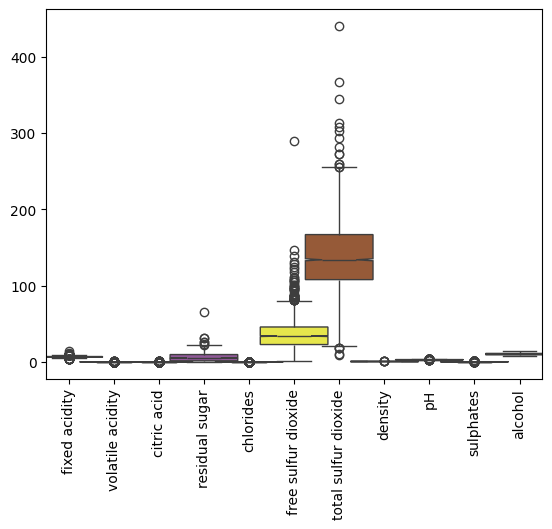

In [143]:
plt.figure ()
sb.boxplot(data=X,orient="v",palette="Set1",width =1.5, notch=True)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels (),rotation =90)
plt.show()


<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    We can see that 8 of the 11 features have values ​​on much smaller scales than the other 3, this indicates the need for normalization or standardization of the variables.
  </p>
  <p>
    There are many outliers in several variables as mentioned above, especially in free sulfur dioxide and total sulfur dioxide. These variables have extreme values ​​that can distort the analysis if left untreated.
  </p>
</div>

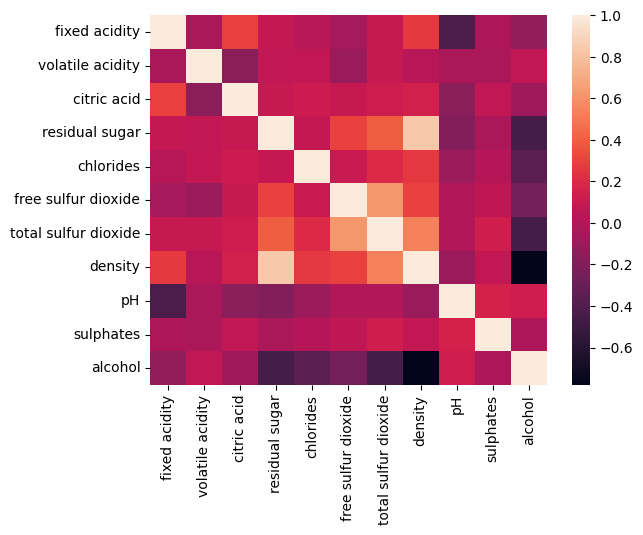

In [144]:
plt.figure ()
corr = X.corr()
sb.heatmap(corr)
plt.show()

<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    In the heatmap above we see the correlation between the features. Thus, we see that:
  </p>
  <ul>
    <li>There is a strong negative correlation between pH and fixed acidity, alcohol and density</li>
    <li>Density also has a strong relationship with the suger residual, but this time, positive</li>
    <li>Features such as fixed acidity, volitile acidity and sulphates do not seem to show a strong correlation with other features, so they may be strong candidates for discarding if it is interesting to reduce the dimensions of the analysis</li>
  </ul>
</div>

### 2 Classification
#### 2.1 Préparation des données
1. Pour transformer ce problème de classification multi-classe en problème de classificaiton binaire, groupez les données en deux classes de qualités du vin : les ”mauvais vins” avec un indice de qualité inférieure ou égal à 5 et les ”bons vins” avec une qualité supérieure à 5. Pour cela, transformez Y pour qu’il contienne des 0 et 1 à la place des classes initiales.

In [145]:
Y[Y<=5] = 0
Y[Y>5] = 1
Y.groupby(Y).count()

/tmp/ipykernel_18819/194443087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y<=5] = 0
/tmp/ipykernel_18819/194443087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y>5] = 1


quality
0    1640
1    3258
Name: quality, dtype: int64

<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    Even in this new distribution, we do not have a balance between the classes. We have approximately twice as many elements classified as good wines.
    </p>
</div>

2. Séparer aléatoirement (X, Y) en trois sous-ensembles Da = (Xa, Ya), Dv = (Xv , Yv ) et Dt = (Xt, Yt), respectivement pour l’apprentissage, la validation et le test. Dans chaque sousensemble, respectez les proportions de classes.

In [146]:
# Primeiro, separe os dados em treino+validação e teste
x_temp, x_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# Em seguida, separe os dados temporários em treino e validação
x_train, x_valid, y_train, y_valid = train_test_split(
    x_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

ptrain = len(y_train)/len(Y)
ptest = len(y_test)/len(Y)
pvalid = len(y_valid)/len(Y)

# Verificando os tamanhos
print(f"Treinamento: {len(y_train)/len(Y)*100:.2f}%")
print(f"Validação: {len(y_test)/len(Y)*100:.2f}%")
print(f"Teste: {len(y_valid)/len(Y)*100:.2f}%")

Treinamento: 59.98%
Validação: 20.01%
Teste: 20.01%


3. Expliquez briévement pourquoi il est important de respecter les proportions de classe et pourquoi la séparation est aléatoire?

<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    It is important to respect the proportion of classes to ensure that each step will have a sufficient number of examples to perform training or testing. The random separation is responsible for providing a proportional distribution of classes.
  </p>
</div>


#### 2.2 Plus Proches Voisins
La méthode des k-PPV utilise les instances de $D_a$ comme données de références. Pour une instance x donnée, la classe prédite est la classe majoritaire parmi ses k ∈ N voisins dans $D_a$. Les voisins
sont les instances les plus proches en terme de distance euclidienne dans X . 

1. Testez cette méthode avec k = 3 et évaluez la performance sur $D_v$ en calculant le taux d’erreur :

$$
  \epsilon = \frac{1}{n} \sum_{i=1}^n 1_{y_i \neq \hat{y_i}}
$$

où 1 est la fonction indicatrice, $n$ est le nombre d’instances, $y_i$ sont les vraies classes et $hat{y_i}$ sont les classes prédites.

In [147]:
def Pred_Knn(x_train, y_train, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    return knn

def Valid_Knn(knn, x_valid, y_valid):
    y_pred = knn.predict(x_valid)

    epsilon = np.mean(y_valid != y_pred)

    return epsilon


In [148]:
k = 3
knn = Pred_Knn(x_train, y_train, k)
epsilon = Valid_Knn(knn, x_valid, y_valid)
print(f"k = {k} -> Epsilon = {epsilon*100:.2f}%")

k = 3 -> Epsilon = 31.33%


2. En suivant la même procédure, testez la méthode avec plusieurs autres valeurs de k ∈ N (dans l’intervalle [1, 40]).


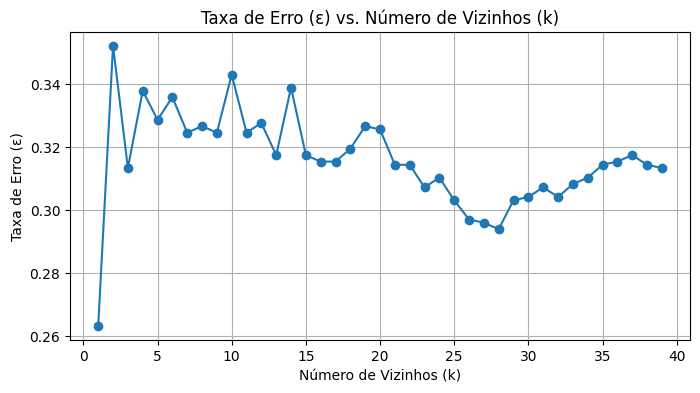

In [149]:
k_values = range(1, 40)
epsilons = []

for k in k_values:
    knn = Pred_Knn(x_train, y_train, k)
    epsilon = Valid_Knn(knn, x_valid, y_valid)
    epsilons.append(epsilon)
    
plt.figure(figsize=(8, 4))
plt.plot(k_values, epsilons, marker='o', linestyle='-')
plt.title('Taxa de Erro (\u03B5) vs. Número de Vizinhos (k)')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Taxa de Erro (\u03B5)')
plt.grid(True)
plt.show()

3. Tracez les courbes d’évolution du taux d’erreur en apprentissage et en validation en fonction de la valeur de k. Expliquez où et comment observer le sur-apprentissage sur la figure

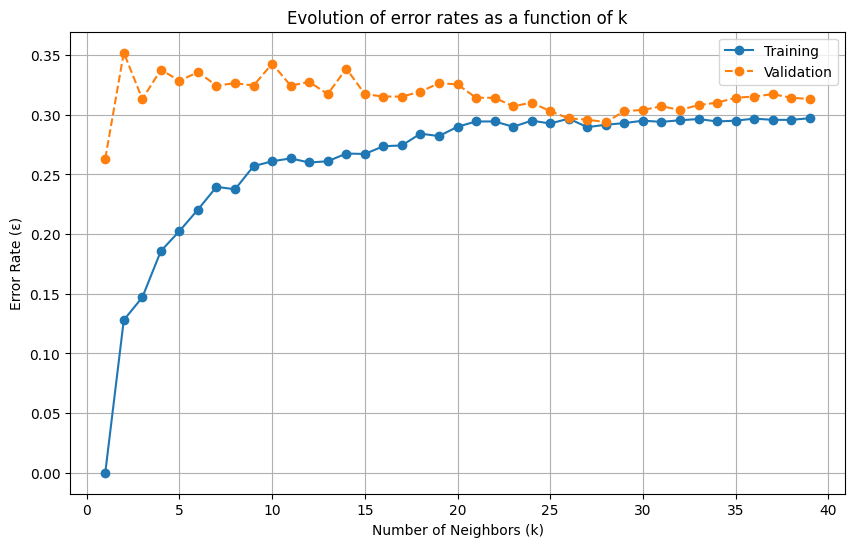

In [150]:
epsilons_train = []

for k in k_values:
    knn = Pred_Knn(x_train, y_train, k)
    epsilon = Valid_Knn(knn, x_train, y_train)
    epsilons_train.append(epsilon)

# Plotando as curvas de erro
plt.figure(figsize=(10, 6))
plt.plot(k_values, epsilons_train, marker='o', label='Training', linestyle='-')
plt.plot(k_values, epsilons, marker='o', label='Validation', linestyle='--')
plt.title("Evolution of error rates as a function of k")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate (\u03B5)')
plt.legend()
plt.grid(True)
plt.show()


In [151]:
mini = np.asarray(epsilons).argsort()[1] + 1
print("k with 2nd lowest validation error: ", mini)

k with 2nd lowest validation error:  28


<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    We can see that we have a local minimum at k=28. After this point, increasing k does not have a great influence on the error of the training data, but causes a considerable increase in the error of the validation data. This is a sign of over-learning.
  </p>
</div>

4. À partir de ces résultats, choisissez la meilleure valeur pour k et évaluer les performances de la méthode sur Dt. Justifiez le choix de cette valeur et commentez les résultats obtenus en test.

In [152]:
knn = Pred_Knn(x_train, y_train, mini)
epsilon = Valid_Knn(knn, x_test, y_test)

print(f"k = {mini} -> Epsilon = {epsilon*100:.2f}%")

k = 28 -> Epsilon = 29.18%


<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    Choosing the value of k before sur-apprentissage effects guarantees us a low error rate on the test data and may be the optimal value for model training. It is the right compromise between biais and variance.
  </p>
</div>

#### 2.3 Normaliser ou non les données?
Il est parfois utile de normaliser les valeurs des caractéristiques dans une base de données pour réaliser l’apprentissage. Il s’agit d’uniformiser les valeurs des caractéristiques, en soustrayant la moyenne à chaque valeur et en divisant par l’écart-type. 

1. Reproduisez les expérimentations de l’exercice précédent avec les données normalisées et
comparez les résultats obtenus avec les précédents résultats. Donnez vos conclusions.

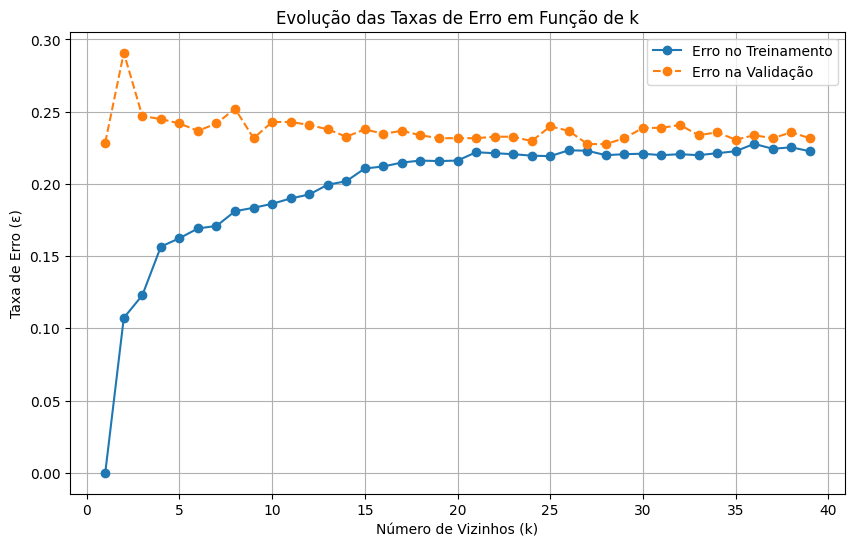

In [153]:
sc = StandardScaler(with_mean=True , with_std=True)
sc = sc.fit(x_train)
Xa_n = sc.transform(x_train)
Xv_n = sc.transform(x_valid)
Xt_n = sc.transform(x_test)

epsilons = []
epsilons_train = []

for k in k_values:
    knn = Pred_Knn(Xa_n, y_train, k)
    epsilon = Valid_Knn(knn, Xv_n, y_valid)
    epsilons.append(epsilon)
    epsilon = Valid_Knn(knn, Xa_n, y_train)
    epsilons_train.append(epsilon)

# Plotando as curvas de erro
plt.figure(figsize=(10, 6))
plt.plot(k_values, epsilons_train, marker='o', label='Training Error', linestyle='-')
plt.plot(k_values, epsilons, marker='o', label='Validation Error', linestyle='--')
plt.title('Evolution of Error Rates as a Function of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate (\u03B5)')
plt.legend()
plt.grid(True)
plt.show()

In [154]:
mini = np.asarray(epsilons).argsort()[0] + 1
print("k with lowest validation error: ", mini)

knn = Pred_Knn(Xa_n, y_train, mini)
epsilon = Valid_Knn(knn, Xt_n, y_test)

print(f"k = {mini} -> Epsilon = {epsilon*100:.2f}%")

k with lowest validation error:  28
k = 28 -> Epsilon = 23.67%


<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    With data normalization, features with smaller-scale variations began to have a greater influence on the model. This change had a positive impact by reducing the validation error rate for all k values.
  </p>
  <p>
    Even after the change, k = 28 was the ideal value found. We can see that the effect of overfitting seems to be reduced after normalization.
  </p>
</div>

/tmp/ipykernel_18819/2355725000.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels (),rotation =90)


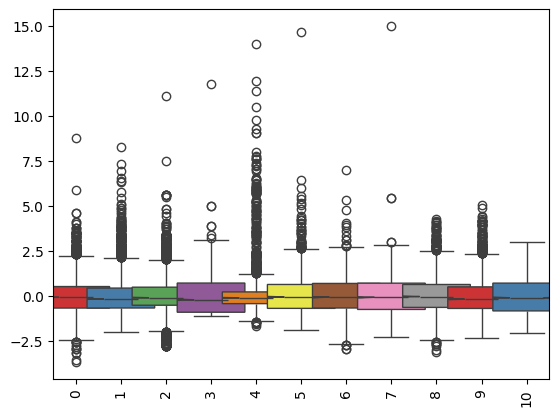

In [155]:
X_n = sc.transform(X)

plt.figure ()
sb.boxplot(data=X_n,orient="v",palette="Set1",width =1.5, notch=True)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels (),rotation =90)
plt.show()

<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    It is also interesting to show that, after normalization, it is simpler to understand and analyze the boxplot. Here we can see the characteristics that have greater variability or that are more influenced by outlier points.
  </p>
</div>